In [1]:
%matplotlib inline

# Clustering Analysis
## How Different Metrics Affect Clustering Results

### Abstract

<div style="background-color: #DAEFF9; padding: 15px; border-radius: 20px; text-align: justify;">
The objective of this article is to present the theory behind the cluster analysis – the different clustering algorithms and the distance metrics that are used when determining the similarity between data points. To help understand the concepts, a couple of practical examples are given and the results – analyzed. It turns out that the outcomes of the clustering process are highly dependent on the selected dissimilarity measurement. The selection of the distance metric should happen based on the knowledge of the specific problem and the characteristics of the data in order to produce meaningful clustering results.
</div>

### Introduction

In our everyday life, everywhere around us, we’re able to recognize specific groups of objects or people that tend to have similar behavior or characteristics. Let’s take as an example us, people. We’re often divided into groups based on our interests: some of us like rock music, others prefer to listen to pop or some other genre. In general, the people in each group will have a similar taste in music and will be more likely to interact with each other, while the people in the different groups won’t have that much in common, at least based on indicators such as the genre preferences. 
  
If we take the example above to a much more scientific setting, those groups, also known as **clusters**, can be defined as *collections of data points that are closely located to each other in a dataset*. The points within a cluster share certain similarities or patterns, making them more similar to each other compared to points in other clusters.
 
Real-world data often tends to exhibit clustering behavior due to various reasons, some of which are:
* **Natural and geographic factors** (climate, landforms, ecological factors)
* **Cultural and ethnic factors** (traditions, beliefs)
* **Socioeconomic factors** (income level, education)
* **Economic factors** (financial districts, technology hubs)
* **Data generation process** (if data is sampled from different groups or sources, clusters may emerge as a result)

It’s important to note that the existence of clusters in real-world data is often influenced by a combination of multiple factors. Clustering techniques aim to identify and analyze the clusters, leading to valuable insights, pattern discovery and allowing decision-making based on the underlying structure of the data.

### Clustering Analysis

**Clustering analysis**, also known as **cluster analysis** or simply **clustering**, is a fundamental concept in data analysis and unsupervised machine learning that involves grouping similar data points together to identify inherent structures, patterns, or relationships within a dataset. The goal is to create clusters that are internally homogeneous (points within a cluster are similar) and externally heterogeneous (points in different clusters are dissimilar).

In **unsupervised learning**, the algorithm explores the data to discover underlying structures or clusters, doing so by leveraging statistical properties, similarities, or patterns within the dataset. Unlike supervised learning, which relies on labeled data to find a mapping between input variables and corresponding target outputs, in unsupervised learning, there is no guidance from a predefined target variables or labels, and the learning process is mainly related to extracting representations within the data itself.

Thus, clustering analysis *does not require labeled data* or prior knowledge about the classes within the data. It can be applied to various types of data – numerical, categorical, or even high-dimensional. The process involves evaluating the similarities or dissimilarities between data points and assigning them to appropriate clusters based on certain criteria.

Here are the typical steps executed as part of the clustering process:
1) **Data representation** – prepare the dataset, select variables of interest, visualize the data.
2) **Similarity measurement** – a similarity or distance metric is defined to quantify the similarity between data points. The chosen metric strongly depends on the nature of the data. One of the most common ones are Euclidean distance, cosine similarity, or correlation coefficient. A more detailed overview of the measurements is presented later in the article.
3) **Clustering algorithm selection** – a suitable algorithm is chosen based on the data characteristics. Some popular clustering algorithms include K-Means Clustering, Hierarchical Clustering, DBSCAN (Density-Based Spatial Clustering of Applications with Noise), and Gaussian Mixture Models (GMM).
4) **Cluster formation** – the algorithm is applied to the data to group similar points together and form clusters.
5) **Cluster evaluation and validation** – the quality of the resulting clusters is evaluated to assess their validity and effectiveness of the algorithm. This can be done with metrics such as silhouette score or a simple visual representation.
6) **Interpretation and analysis** – when clusters are formed, they can be interpreted to gain valuable insights and make data-driven decisions.

Clustering analysis is a powerful technique which finds applications in various fields, including data mining, pattern recognition, image analysis, customer segmentation, social network analysis, and market research. The specific choice of clustering algorithm and interpretation of results will depend on the characteristics of the data and the objectives of the analysis.

#### A Simple Example with Generated Data

As mentioned earlier, one of the reasons for the existence of clusters can be found in the data generation and collection process, that is, in the way a given sample is obtained.

To visually represent the theory from the sections above, let’s generate some points in 2-dimensional space in such a way that they belong to three clusters. We’ll provide the centers of each group as well as the standard deviations of the points from the centers. The *random_state* argument is added in order to achieve reproducible output.

In [3]:
centers = [[1, 1], [-1, -2], [1, -2]]
features, true_labels = make_blobs(n_samples = 3000,
                                   n_features = 2, 
                                   centers = centers, 
                                   cluster_std = 0.7, 
                                   random_state = 1234)

Let's observe the result: variable features is of type array, and it holds the 3000 generated tuples of 2 values for each of the dimensions. At the same time, in labels stored as integers are the labels for cluster membership of each sample. In that case, our clusters will be called 0, 1 and 2.

In [4]:
print("Values of the features:\n", features)
print("\nClusters labels:\n", true_labels)

Values of the features:
 [[ 0.46788148  0.95082005]
 [-0.09846095 -1.01266083]
 [-1.79104618 -1.66655315]
 ...
 [ 1.74604715 -2.4678901 ]
 [-1.8189012  -2.293156  ]
 [ 1.98258164 -0.03559728]]

Clusters labels:
 [0 1 1 ... 2 1 0]


In [5]:
x_values = features[:,0]
y_values = features[:,1]

Now, let's plot the generated poins together with the predefined centers. Next to them - the clusters that are formed.

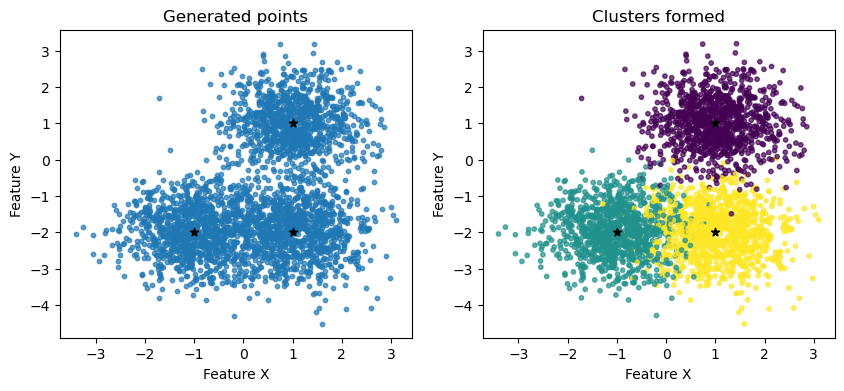

In [6]:
f, (smpl, clst) = plt.subplots(1, 2, figsize = (10, 4))
smpl.scatter(x_values, y_values, s = 10, alpha = 0.7)
smpl.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], c="black", marker = "*")
smpl.set_title("Generated points")
smpl.set_xlabel("Feature X")
smpl.set_ylabel("Feature Y")

clst.scatter(x_values, y_values, s = 10, alpha = 0.7, c = true_labels)
clst.scatter(np.array(centers)[:, 0], np.array(centers)[:, 1], c="black", marker = "*")
clst.set_title("Clusters formed")
clst.set_xlabel("Feature X")
clst.set_ylabel("Feature Y")
plt.show()

Note that, in this example, we were generating the points together with their assignment to a given cluster, meaning it was predefined. 

In reality, we often have no knowledge of the belonging of a given object to a group - that is, we're missing the 'labels' from the example above and our goal is to apply a method which will group the similar data points. As most algorithms are distance-based, some of the points near the margin of the clusters in the chart above will be allocated to another group. A great representation of that is the yellow point near the center of the green cluster.

#### Using Distance to Define Clusters

At the core of cluster analysis is the concept of **measuring distances** between data points in order to obtain their proximity. To define the clusters, we’re interested in finding two types of distances:

* **Intracluster distance** is the one between the data points inside the cluster. The smaller the distance, the more similar are the points.
* **Intercluster distance** is the one between data points in different clusters. The greater the distance, the clustering effect is stronger.

Thus, in the data-grouping process, we are aiming to maximize intraclass similarity (minimize intracluster distance) while minimizing the interclass similarity (maximize intercluster distance).

In the previous example, we can say that the intracluster distance is relatively small, but clusters are close to each other, even merging, meaning that intercluster distance is also lower.

The choice of distance measure is very important, as it has a strong influence on the clustering results, cluster shape and properties. One of the most popular metrics is the Euclidean distance but depending on the data type and the goal of the analysis, other dissimilarity measures might be preferred. 

Let’s have a look at the different options for measuring distances.

##### 1. Euclidean Distance
Considered as a traditional metric, the Euclidean distance is defined as *the “ordinary” straight-line distance between two points in Euclidean space*. The formula is rather straightforward as the distance is calculated from the cartesian coordinates of the points, using the Pythagorean theorem. 

In the two-dimensional case and given the points with coordinates $ A(p_1, p_2) $ and $ B(q_1, q_2) $, we have:
$$ d_{Euc} = \sqrt{(p_1 – q_1)^2 + (p_2 – q_2)^2} = \sqrt{\sum_{i=1}^{2}{(p_i-q_i)^2}} $$

We can generalize it for an $ n $-dimensional space as:
$$ d_{Euc} = \sqrt{\sum_{i=1}^{n}{(p_i-q_i)^2}} $$

Although commonly used, Euclidean distance might lead to skewed results if features are measured in different scales, thus, giving more importance to some of them and neglecting others. That’s why it is often a good practice to **normalize** the data before computing the distance measure.

##### 2. Squared Euclidean Distance
It’s identical to the Euclidean measurement as it is the sum of the squared differences, but without taking the square root at the end. It has the advantage to speed the computation since there is no need to take the root and it’s mainly used to place progressively greater weight on objects that are further apart.
$$ d_{{Euc}^{2}} = \sum_{i=1}^{n}{(p_i-q_i)^2} $$

##### 3. Manhattan Distance
The metric represents the *distance between two points measured along axes at right angles* and is often referred as **city block** distance as it measures distances travelled by a taxicab in street configuration. Note that we’re taking the *absolute* value of both the vertical and horizontal components, in order to prevent negative amounts coming into play.

Below are the formulas for computing the Manhattan distance in the 2D case (with points $ A(p_1, p_2) $ and $ B(q_1, q_2) $), as well as the generalization to multiple dimensions:
$$ d_{Man} = |p_1-q_1| + |p_2-q_2| $$
$$ d_{Man} = \sum_{i=1}^{n}{|p_i-q_i|} $$

##### 4. Chebyshev Distance
Also known as **maximum value distance**, Chebyshev distance is the *greatest distance between two vectors along any coordinate dimension*. In other words, it is simply the maximum distance along one axis. It is given by the formula:
$$ d_{Che} = \max{|p_i-q_i|} $$

##### 5. Minkowski Distance
It is the **generalized form** of different distance measures like Euclidean, Manhattan and Chebyshev distances. Minkowski distance of order $ k $ $ (k \geq 1) $ in an $ n $-dimensional space is defined as:
$$ d_{Min} = \sqrt[k]{\sum_{i=1}^{n}{|p_i-q_i|^k}} $$

Most interestingly about this distance measure is the use of the parameter $ k $. The formula, when $ k = 1 $ results in Manhattan distance, when $ k = 2 $ – in Euclidean, and when $ k = \infty $ results in Chebyshev distance. The value of $ k $ has its effect on the shape of a cluster that a certain distance measure produces. For example, $ k = 2 $ assumes circular cluster shapes, $ k = 1 $ is associated with square shapes (in 2D space) or diamond-like shapes (when $ n > 2 $), while $ k = \infty $ assumes clusters in the form of a box with sides parallel to the axes.

![Distance measures](distance.jpg)

##### 6. Correlation-based Distance
Depending on the type of the data and desired outcome, other dissimilarity measures such as **correlation-based distances** might be preferred. This measure considers two objects to be similar if their features are highly correlated, even though the observed values may be far apart in terms of Euclidean (or other) distance. There are different types of correlation methods but most commonly used is Pearson correlation distance. It’s obtained by subtracting the correlation coefficient from 1 and measures the degree of linear relationship between two instances.
$$ d_{cor} = 1 - \frac {\sum_{i=1}^{n}{(p_i - \bar{p})(q_i - \bar{q})}}{\sqrt{\sum_{i=1}^{n}(p_i - \bar{p})^2\sum_{i=1}^{n}(q_i - \bar{q})^2}} = 1 - r, $$ where $ r $ is the correlation coefficient.


#### Computing Distances Between Points in Python

Let’s go back to the example above and choose one point. Then, calculate the distance from that point to each of the three centers by using the distance metrics discussed in the previous section. Compare the results. Depending on the distances, to which cluster should the point be assigned?

We start by organizing the generated data in a dataframe:

In [7]:
data = pd.DataFrame(features)
data.columns = ["x_values", "y_values"]
data["labels"] = true_labels
data

,x_values,y_values,labels
0,0.467881,0.950820,0
1,-0.098461,-1.012661,1
2,-1.791046,-1.666553,1
3,2.625740,-2.382873,2
4,-1.346035,-2.964141,1
...,...,...,...
2995,-1.806174,-1.109751,1
2996,0.663156,-2.185238,2
2997,1.746047,-2.467890,2
2998,-1.818901,-2.293156,1


Here, the labels correspond to the colors from the plotted graph as follows: 0 - purple, 1 - green, 2 - yellow.

Let's choose a point which is somewhere on boundary between the green and yellow cluster. To select it, we are passing a number of conditions to define the desired area of points.

In [8]:
point = data[(data["x_values"] > -0.1) &
             (data["x_values"] < 0) & 
             (data["y_values"] > -2) & 
             (data["y_values"] < -1.9)]
point

,x_values,y_values,labels
171,-0.058302,-1.988206,1
216,-0.074267,-1.917424,2
1043,-0.048573,-1.985320,1
1538,-0.093481,-1.964791,1


Take the second point which belongs to the yellow cluster (true label is 2):

In [9]:
point_x = point.x_values.iloc[1]
point_y = point.y_values.iloc[1]
point_true_label = point.labels.iloc[1]

In [10]:
point_x, point_y, point_true_label

(-0.07426681244293132, -1.9174235770782315, 2)

In [11]:
point_xy = [[point_x, point_y]]

In [12]:
point_xy

[[-0.07426681244293132, -1.9174235770782315]]

It's a good practice to standardize variables before computing a distance metric. However, in this case, it is not needed, since the sample was generated with *make_blobs* function which returns normally distributed data.

Thus, we can proceed with calculating the distances between the chosen point and the three centers. Then, we create a dataframe showing the distances to each center per metric used.

In [13]:
purple_center_dist = []
green_center_dist = []
yellow_center_dist = []
for metric in ["euclidean", "sqeuclidean", "manhattan", "chebyshev", "minkowski"]:
    purple_center_dist.append(pairwise_distances(point_xy, centers, metric = metric)[0][0])
    green_center_dist.append(pairwise_distances(point_xy, centers, metric = metric)[0][1])
    yellow_center_dist.append(pairwise_distances(point_xy, centers, metric = metric)[0][2])

In [14]:
point_center_distances = pd.DataFrame({"Purple": purple_center_dist, 
                                       "Green": green_center_dist,
                                       "Yellow": yellow_center_dist})
point_center_distances.index = ["Euclidean", "Sq. Euclidean", "Manhattan", "Chebyshev", "Minkowski"]
point_center_distances

,Purple,Green,Yellow
Euclidean,3.108924,0.929409,1.077436
Sq. Euclidean,9.665410,0.863801,1.160868
Manhattan,3.991690,1.008310,1.156843
Chebyshev,2.917424,0.925733,1.074267
Minkowski,3.108924,0.929409,1.077436


Notice how the Minkowski distance is exactly the same as the Euclidean. The reason is that the parameter in the default specification of Minkowski distance is set to 2, which, as discussed, results in Euclidean distance.

We can further provide the parameter and do the computations:

In [15]:
for p in range(1, 10):
    print("For k =", p, "the distances to each center are:",
          *pairwise_distances(point_xy, centers, metric = "minkowski", p=p)[0])

For k = 1 the distances to each center are: 3.991690389521163 1.0083096104788372 1.1568432353646998
For k = 2 the distances to each center are: 3.108924172830248 0.9294088444635793 1.0774358681326934
For k = 3 the distances to each center are: 2.9651902497797655 0.9259521514756465 1.0744294260512408
For k = 4 the distances to each center are: 2.9307409217518807 0.925747839541942 1.0742761885403145
For k = 5 the distances to each center are: 2.921362885722964 0.9257342331581188 1.0742673890251204
For k = 6 the distances to each center are: 2.918634380500364 0.9257332652812018 1.0742668493767584
For k = 7 the distances to each center are: 2.9178059783825017 0.9257331934997085 1.0742668148763759
For k = 8 the distances to each center are: 2.917546815650315 0.9257331880208974 1.074266812606603
For k = 9 the distances to each center are: 2.917463918109396 0.9257331875938456 1.0742668124541144


Now, let's add two new columns in the dataframe - *Min Distance* per metric and *Nearest Cluster* to our selected point based on the metric.

In [16]:
point_center_distances["Min Distance"] = point_center_distances.min(axis = 1)
point_center_distances["Nearest Cluster"] = point_center_distances.idxmin(axis = 1)

In [17]:
point_center_distances

,Purple,Green,Yellow,Min Distance,Nearest Cluster
Euclidean,3.108924,0.929409,1.077436,0.929409,Green
Sq. Euclidean,9.665410,0.863801,1.160868,0.863801,Green
Manhattan,3.991690,1.008310,1.156843,1.008310,Green
Chebyshev,2.917424,0.925733,1.074267,0.925733,Green
Minkowski,3.108924,0.929409,1.077436,0.929409,Green


All metrics used suggest that the point is closer to the green (label = 1) cluster compared to the other two. In reality, the point belongs to the yellow cluster with true label 2.

The concept we were exploring with this practical example is close to that of an algorithm known as K-means clustering which aims to find distances between data points and centers of clusters and based on the distances to assign a given point to a cluster. Let’s observe this algorithm in the next section.

#### K-means Clustering

**K-means clustering** is a powerful algorithm for partitioning a dataset into **K clusters**. It’s one of the most popular Centroid-based or Partitional clustering techniques which divides the data into non-overlapping groups, meaning that a given object cannot be a member of more than one cluster.

The algorithm is an **iterative process** which aims to minimize the within-cluster sum of squared distances between a data point and the center of the cluster it is assigned to. To be precise, we use the term **centroid** to refer to the center (mean) of a given cluster, while the distance measure could be one of the discussed in the previous section. Typically, Euclidean distance is preferred.

As already stated, in unsupervised learning, we are not aware of the membership of the data points as well as the number of clusters that exist in the sample. That’s why the execution of the K-means algorithm starts with defining the number of clusters we would like to obtain.

Here are the steps involved in the algorithm:
1. Specify the number K of clusters. There are different methods for selecting the right value of k, which will be discussed shortly.
2. Randomly select K points to initialize the centroids.
3. Assign each data point to the nearest centroid based on a chosen distance metric. The point becomes a member of the cluster which corresponds to the closest centroid.
4. Recalculate the centroids (means) of the newly formed clusters.
5. Iteration: steps 3. and 4. are repeated until convergence criteria is met. In each iteration, data points are reassigned to the nearest centroid and the centroid position is updated. The algorithm converges when the cluster assignments and centroids stabilize, and there are no significant changes in subsequent iterations. Convergence of the algorithm could also happen if a maximum specified limit of the number of iterations is reached.

The quality of the cluster assignments is assessed after each iteration by computing the **sum of squared errors (SSE)**, which is simply the sum of squared intracluster distances of each point to the closest centroid. With every iteration, each object is assigned to the nearest centroid and centroids are updated, thus, the sum of distances is reduced or, at worst, remains unchanged. Since we have finitely many cluster configurations and the new centers better represent the assigned data points, each iteration is an improvement, and a *local minimum* is always reached.

However, achieving a *global optimal solution* is not guaranteed when performing K-means clustering, because the algorithm is strongly dependent on the initial selection of the centroids. Different initializations can lead to different outcomes, potentially resulting in suboptimal formation of clusters or slow convergence. Sometimes, the choice of initial centroids can even introduce bias towards certain cluster configurations. For example, if the initial centers are placed close to each other or in regions with high data density, the algorithm may converge to a solution where clusters are merged or improperly separated.

To reduce the dependence on the initialization, several strategies might be employed with the objective of obtaining a more accurate and stable clustering results. One of the most commonly used options is to run the algorithm multiple times with different initializations and then choose the cluster assignments from the initialization with the lowest total sum of squared distances (or another predefined criterion). An approach of choosing centroids that are farther away from each other could also work. The first centroid is randomly selected, the next one is the data point that is farthest away from it and so on. This results in centroids that are well spread-out from each other.

Still, the question of how to decide on the **right number of clusters** in the initialization step of the method remains. In general, there are two complementary evaluation techniques that could help in choosing the appropriate value of K:
* **The Elbow method**
* **The Silhouette coefficient**

To perform the **Elbow method**, K-means clustering has to be run several times for a range of K values (let’s say, from 1 to 10) and for each execution, the SSE should be recorded. As expected, increasing the number of K leads to continuous decrease in SSE. Then, the SSE is plotted as a function of the number of clusters and the x-value at which SSE starts to bend (known as the elbow point) is considered to be the best K.

The **Silhouette coefficient (score)** quantifies how well a data point fits into its assigned cluster based on two factors: how close the data point is to other points in the cluster (cohesion); how far away the data point is from points in other clusters (separation). The coefficient ranges between -1 and 1, where larger numbers indicate that clusters are well separated. To find the optimal K with this method, the K-means algorithm is run several times with different K values, which produces different scores. The best K corresponds to the case with the highest Silhouette coefficient.

![Elbow and Silhouette methods](elbow-silhouette.jpg)

#### Hierarchical Clustering

In comparison to K-means, **hierarchical clustering** has a different underlying algorithm for how the clustering mechanism works. It uses agglomerative or divisive techniques while seeking to build a hierarchy of clusters. The main idea of the algorithm is that nearby objects are more related than objects that are farther away, thus, it does the grouping based on distance. The distance measures used in K-means clustering are applicable here as well, and they have their impact on the clustering outcome.

**Agglomerative clustering** is a type of hierarchical clustering that uses a “bottom-up” approach. This implies that the algorithm starts with all data points assigned to a cluster of their own. Then, the two nearest clusters (in terms of distance) are merged into the same cluster. The process terminates when all data points establish one large cluster. 

It is also possible to follow a “top-down” approach in the case of **Divisive hierarchical clustering**, which simple means that the algorithm starts with all data points assigned to the same cluster and on each iteration, they’re split into smaller ones until each point forms a cluster on its own at the end.

The results of hierarchical clustering can be shown using a **dendrogram**. In the dendrogram, the y-axis marks the distance between the clusters in the data space. The data points are placed beside the x-axis such that clusters don’t mix.

Dendrograms are frequently used to examine hierarchical clusters before deciding on the appropriate number of clusters for the dataset. The best K equals the number of vertical lines in the dendrogram which are intersected by a horizontal line going through a threshold distance such that it cuts the longest vertical line.

![Dendrogram](dendrogram.jpg)

Let’s look at an example with Customers data to see how the different algorithms described above can help with the task of identifying clusters of customers with similar behavior.

#### Python Implementation of Algorithms with Different Distance Measures

Identification of customers based on their choices is an important strategy in any organization because it may help in approaching customers with specific offers. 

The file *"Mall_Customers.csv"* consists of records for 200 mall customers. Provided are the Customer ID, Gender and Age of the client, as well as the Annual Income (k$) and the Spending Score (being an integer in the range [1; 100]).

Our goal will be to identify a number of customer segments which will help in the decision- and strategy-making process related to the targeting of specific groups by the stores in the mall. We'll also demonstrate how different distance measures could affect the clustering outcome - in some cases, the difference might be negligible, but, in others, we could end up with a completely different segmentation.

But let's first start by loading the dataset and observing the features included.

In [18]:
mall_customers = pd.read_csv("Mall_Customers.csv")
mall_customers

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [19]:
mall_customers.describe() # descriptive statistics

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


It's always a good practice to start by observing the dataset. We can see that there are no missing values for any of the variables, our customers are of age between 18 and 70, and their annual income ranges from 15k to 137k USD. 

Plotting the data will give us much more insights on the clients' income and spending behavior.

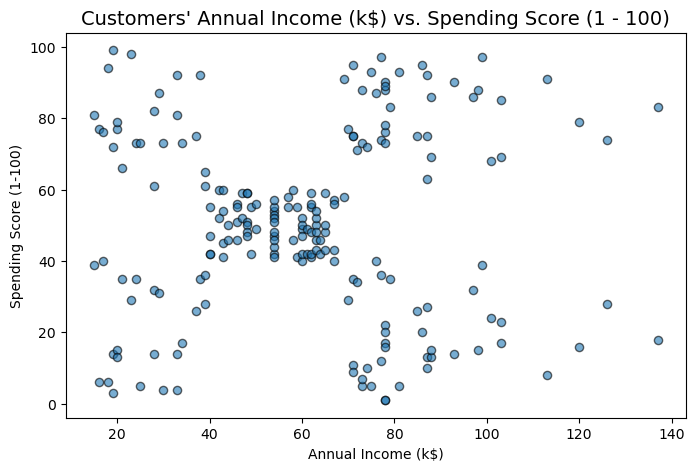

In [20]:
plt.figure(figsize = (8, 5))
plt.scatter(mall_customers["Annual Income (k$)"], mall_customers["Spending Score (1-100)"],
            edgecolor = "black", alpha = 0.6, s = 35)
plt.title("Customers' Annual Income (k$) vs. Spending Score (1 - 100)", fontsize = 14)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.show()

Looking at the graph we can clearly recognize a group with average income and spending score in the middle of the scale. Most of the customers seems to belong to it. 

We can further affirm this statement by plotting the histograms of our variables of interest - Income and Spending.

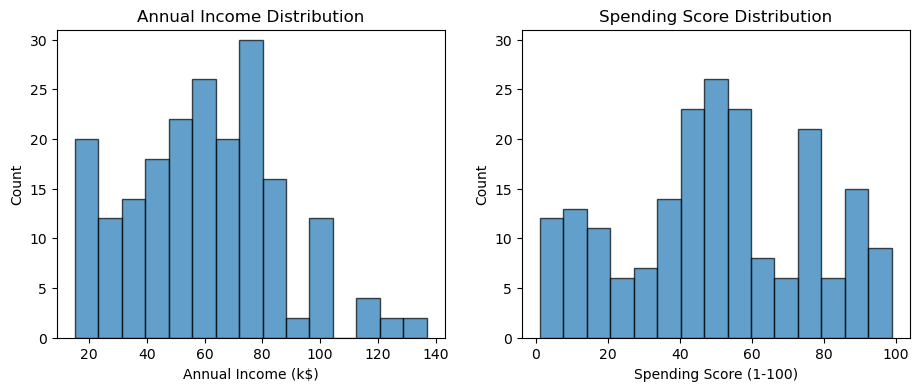

In [21]:
fig, (incm, score) = plt.subplots(1, 2, figsize = (11, 4))
incm.hist(mall_customers["Annual Income (k$)"], bins = 15, edgecolor = "black", alpha = 0.7)
incm.set_title("Annual Income Distribution")
incm.set_xlabel("Annual Income (k$)")
incm.set_ylabel("Count")
incm.set_ylim(0, 31)

score.hist(mall_customers["Spending Score (1-100)"], bins = 15, edgecolor = "black", alpha = 0.7)
score.set_title("Spending Score Distribution")
score.set_xlabel("Spending Score (1-100)")
score.set_ylabel("Count")
score.set_ylim(0, 31)

plt.show()

We can proceed with applying the first clustering technique and see the results. 

Before that, as already stated, some distance metrics are dependent on the scaling of the variables. As we have Income in thousands of dollars and Spending score represented by a number, we need to perform standardization of the features.

In [22]:
scaler = StandardScaler()
income_spending_array = (mall_customers.iloc[:, 3:5]).values
income_spending = scaler.fit_transform(income_spending_array)
income_spending = pd.DataFrame(income_spending, columns = ["Income", "Spending Score"])
income_spending

,Income,Spending Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


##### K-Means

Before fitting the K-Means algorithm, we should first decide on the number of clusters which needs to be provided as an argument to the function during the initialization.

We'll use both methods discussed in the article - Elbow method and Silhouette Score, and compare the suggestions for the optimal K.

In [23]:
sum_of_squared_distances = []
silhouette_scores = []
K = range(2, 11)
for k in K:
    km = KMeans(n_clusters = k, n_init = "auto", random_state = 1234)
    km_labels = km.fit_predict(income_spending)
    sum_of_squared_distances.append(km.inertia_)
    silhouette_avg = silhouette_score(income_spending, km_labels)
    silhouette_scores.append(silhouette_avg)

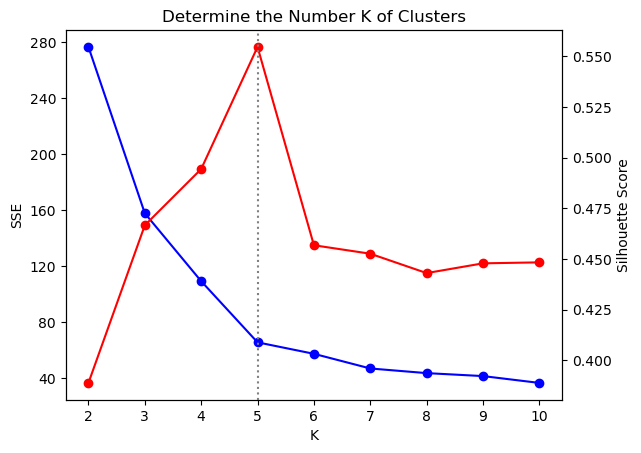

In [24]:
fig1, ax1 = plt.subplots()

ax1.plot(K, sum_of_squared_distances, 'bo-')
ax1.set_xlabel('K')
ax1.set_ylabel('SSE')
ax1.set_yticks(np.arange(40, 300, 40))
ax1.grid(False)

ax2 = ax1.twinx()
ax2.plot(K, silhouette_scores, 'ro-')
ax2.set_ylabel('Silhouette Score')
ax2.grid(False)

plt.axvline(x=5, color='grey', linestyle=':')
plt.title('Determine the Number K of Clusters')
plt.show()

The highest Silhouette score is around 0.55 and is achieved when we partition the dataset to 5 clusters. The same value for K is given by the Elbow method where the sum of squared distances (inertia) is around 70.

Thus, let's set K = 5 and proceed with predicting the cluster assignments using K-Means. By default, it uses the Euclidean distance to compute the point-to-centroid gap, and we're also setting the random_state for reproducibility.

In [25]:
kmeans_euc = KMeans(n_clusters = 5, n_init = "auto", random_state = 1234)
clusters_predicted_euc = kmeans_euc.fit_predict(income_spending.iloc[:, 0:2])

In [26]:
income_spending["K-Means clusters"] = clusters_predicted_euc
income_spending

,Income,Spending Score,K-Means clusters
0,-1.738999,-0.434801,0
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,0
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,0
...,...,...,...
195,2.268791,1.118061,2
196,2.497807,-0.861839,1
197,2.497807,0.923953,2
198,2.917671,-1.250054,1


We can also print the coordinates of the 5 cluster centroids and check the number of customers in each group.

In [27]:
centroids = kmeans_euc.cluster_centers_ 
centroids

array([[-1.30751869, -1.13696536],
       [ 1.05500302, -1.28443907],
       [ 0.99158305,  1.23950275],
       [-1.32954532,  1.13217788],
       [-0.20091257, -0.02645617]])

In [28]:
income_spending["K-Means clusters"].value_counts()

4    81
2    39
1    35
0    23
3    22
Name: K-Means clusters, dtype: int64

Now, plot the clusters and their centroids.

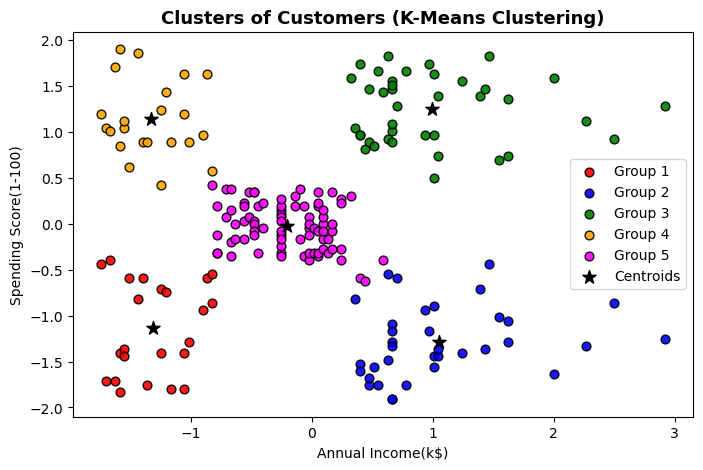

In [29]:
plt.figure(figsize = (8, 5))
colors = ['red', 'blue', 'green', 'orange', 'magenta']
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
for i in range(5):
    plt.scatter(income_spending[income_spending["K-Means clusters"] == i]["Income"],
                income_spending[income_spending["K-Means clusters"] == i]["Spending Score"], 
                c=colors[i], label = labels[i], edgecolor = "black", alpha = 0.9, s = 40)

plt.scatter(centroids[:, 0], centroids[:, 1], c="black", marker = "*", s = 100, label = "Centroids")
plt.title('Clusters of Customers (K-Means Clustering)', fontweight = "bold", fontsize = 13)
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

How can we analyze the result? The different groups of customers of the mall can be described as follows:
* **Group 1 (Red)**: They have low income and are not spending much. 23 clients of all 200 are in this segment. 
* **Group 2 (Blue)**: High-income clients with low spending score. 35 of all belong to this group. 
* **Group 3 (Green)**: High-income and more spending. 39 are assigned to this one. 
* **Group 4 (Orange)**: Low-income individuals who like to spend more. This is the smaller cluster with 22 clients in it.
* **Group 5 (Pink)**: Middle-income and corresponding middle-score of spending. The high density cluster with 81 customers.

##### Agglomerative Clustering

We can start by exploring the dendrogram to see if it also suggests that the optimal number of clusters is five.

While fitting the tree, we are passing as arguments the distance metric - by default, Euclidean, and the linkage method - "ward", the latter simply referring to the way the distance between clusters is to be calculated. In this case, the ward method attemts to minimize the increase in the variance within each cluster when performing the merging in each step.

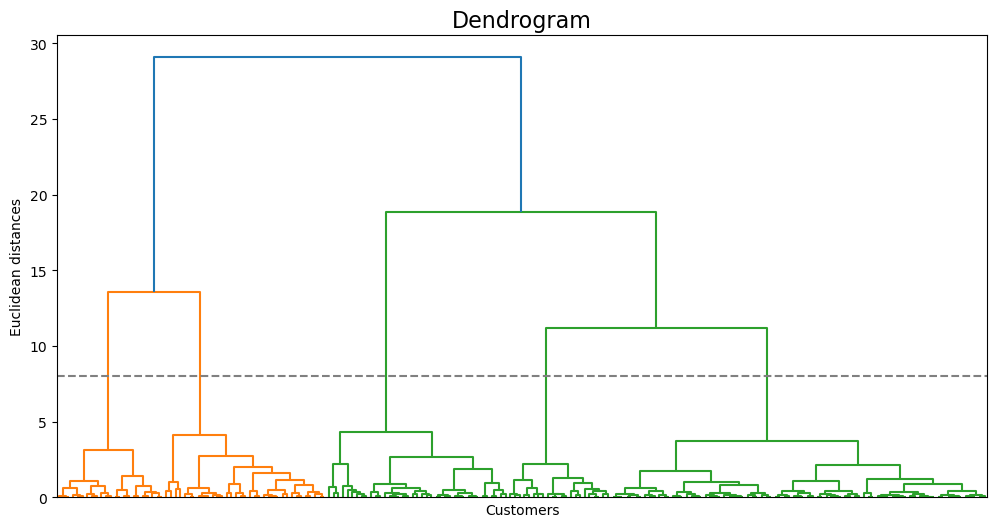

In [30]:
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(income_spending, method  = "ward", metric = "euclidean"))
plt.axhline(y = 8, c = "grey", linestyle = "--")
plt.title('Dendrogram', fontsize = 16)
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.xticks([])
plt.show()

Based on the rule for cutting the longest vertical line of the dendrogram, we can once again choose K = 5 for the initialization of the Agglomerative clustering. Let's use the technique to predict the cluster assignments.

In [31]:
ahc_euc = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
ahc_predicted_euc = ahc_euc.fit_predict(income_spending.iloc[:, 0:2])

In [32]:
income_spending["AHC clusters"] = ahc_predicted_euc
income_spending

,Income,Spending Score,K-Means clusters,AHC clusters
0,-1.738999,-0.434801,0,4
1,-1.738999,1.195704,3,3
2,-1.700830,-1.715913,0,4
3,-1.700830,1.040418,3,3
4,-1.662660,-0.395980,0,4
...,...,...,...,...
195,2.268791,1.118061,2,1
196,2.497807,-0.861839,1,0
197,2.497807,0.923953,2,1
198,2.917671,-1.250054,1,0


Unlike K-means, Agglomerative clustering does not directly provide us with the clusters centroids. We can calculate them manually and count how many clients are assigned to each group.

In [33]:
AHC_centroids = []
X = income_spending.iloc[:, 0:2]
for label in np.unique(ahc_predicted_euc):
    centroid = np.mean(X[ahc_predicted_euc == label], axis=0)
    AHC_centroids.append(centroid)

AHC_centroids = np.array(AHC_centroids)
AHC_centroids

array([[ 1.1010449 , -1.34346864],
       [ 0.99158305,  1.23950275],
       [-0.18123743, -0.04156191],
       [-1.35366972,  1.15873115],
       [-1.30751869, -1.13696536]])

In [34]:
income_spending["AHC clusters"].value_counts()

2    85
1    39
0    32
4    23
3    21
Name: AHC clusters, dtype: int64

Now, let's do the plotting.

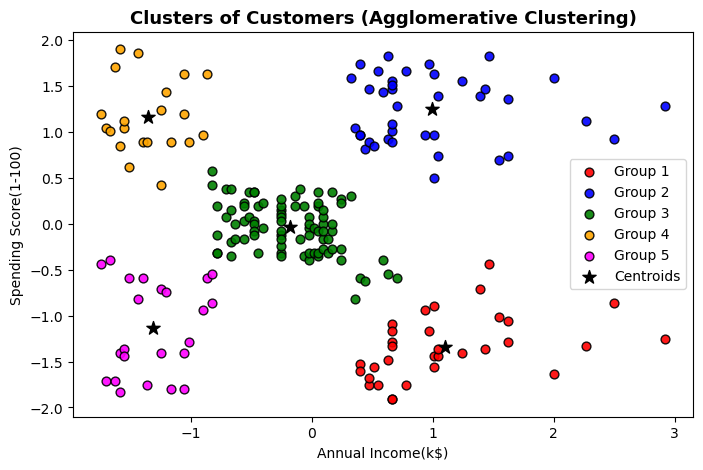

In [35]:
plt.figure(figsize = (8, 5))
colors = ['red', 'blue', 'green', 'orange', 'magenta']
labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
for i in range(5):
    plt.scatter(income_spending[income_spending["AHC clusters"] == i]["Income"],
                income_spending[income_spending["AHC clusters"] == i]["Spending Score"], 
                c=colors[i], label = labels[i], edgecolor = "black", alpha = 0.9, s = 40)

plt.scatter(AHC_centroids[:, 0], AHC_centroids[:, 1], c="black", marker = "*", s = 100, label = "Centroids")    
plt.title('Clusters of Customers (Agglomerative Clustering)', fontweight = "bold", fontsize = 13)
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

The resulting clusters are almost the same as the ones produced by K-means. Note that in both cases we were using Euclidean distance as a (dis)similarity measure.

As discussed, there are other distance metrics which might be used by the algorithm to calculate distances between points. 

Let's summarize the code from above in a function that takes the preferred metric and linkage method, performs Agglomerative clustering and plots the resulting groups of clients.

In [36]:
def agglomerative_clustering(metric, linkage):
    """ 
    Performs Agglomerative clustering based on a user specified distance metric and linkage method.
    
    Possible metric: must be one of the options allowed by sklearn.metrics.pairwise_distances or “precomputed”. 
    If linkage is “ward”, only “euclidean” is accepted. If “precomputed”, 
    a distance matrix is needed as input for the fit method.
    
    Possible linkage: ‘ward’, ‘complete’, ‘average’, ‘single’.
    """
    
    # Fit 
    if metric == "precomputed":
        ahc = AgglomerativeClustering(n_clusters = 5, metric = "precomputed", linkage = linkage)
        m = pairwise_distances(income_spending.iloc[:, 0:2], income_spending.iloc[:, 0:2], metric=custom_dist)
        predicted_clusters = ahc.fit_predict(m)
        data = income_spending.iloc[:, 0:2]
        data["AHC_" + metric] = predicted_clusters
    else:
        ahc = AgglomerativeClustering(n_clusters = 5, metric = metric, linkage = linkage)
        predicted_clusters = ahc.fit_predict(income_spending.iloc[:, 0:2])
        data = income_spending.iloc[:, 0:2]
        data["AHC_" + metric] = predicted_clusters
    
    # Compute Centroids
    AHC_centroids = []
    X = income_spending.iloc[:, 0:2]
    for label in np.unique(predicted_clusters):
        centroid = np.mean(X[predicted_clusters == label], axis=0)
        AHC_centroids.append(centroid)

    AHC_centroids = np.array(AHC_centroids)
    
    # Count points in each cluster
    count = data["AHC_" + metric].value_counts()
    
        # Create a scatterplot of the clusters
    plt.figure(figsize = (8, 5))
    colors = ['red', 'blue', 'green', 'orange', 'magenta']
    labels = ['Group 1', 'Group 2', 'Group 3', 'Group 4', 'Group 5']
    for i in range(5):
        plt.scatter(data[data["AHC_" + metric] == i]["Income"],
                    data[data["AHC_" + metric] == i]["Spending Score"], 
                    c=colors[i], label = labels[i], edgecolor = "black", alpha = 0.9, s = 40)
    
    plt.scatter(AHC_centroids[:, 0], AHC_centroids[:, 1], c="black", marker = "*", s = 100, label = "Centroids") 
    if metric == "precomputed":
        plt.title(f'Clusters of Customers: AHC with custom distance metric', fontweight = "bold", fontsize = 13)
    else:
        plt.title(f'Clusters of Customers: AHC with {metric} distance', fontweight = "bold", fontsize = 13)
    plt.xlabel('Annual Income(k$)')
    plt.ylabel('Spending Score(1-100)')
    plt.legend()
    plt.show()
    
    return print("Count of Customers:\n", count)

First, we'll use Euclidean distance, but change the linkage method to "complete". We're doing that, because "ward" can only be used with Euclidean, but our objective is to apply the function with other distances as well, and compare the clustering results.

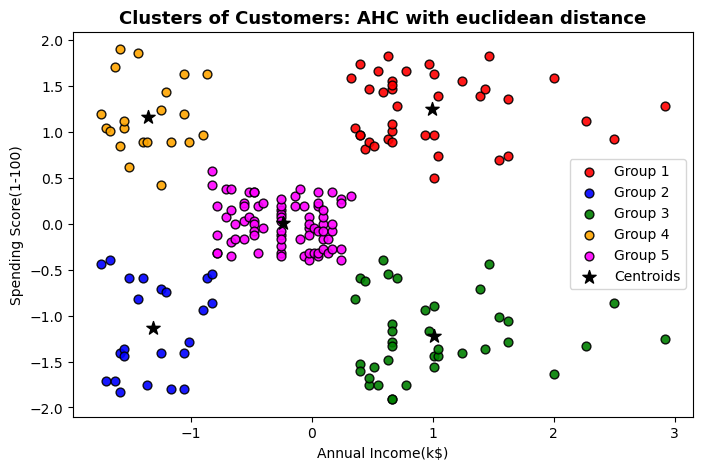

Count of Customers:
 4    79
0    39
2    38
1    23
3    21
Name: AHC_euclidean, dtype: int64


In [37]:
agglomerative_clustering("euclidean", "complete")

Now, change the distances to "manhattan" and "chebyshev":

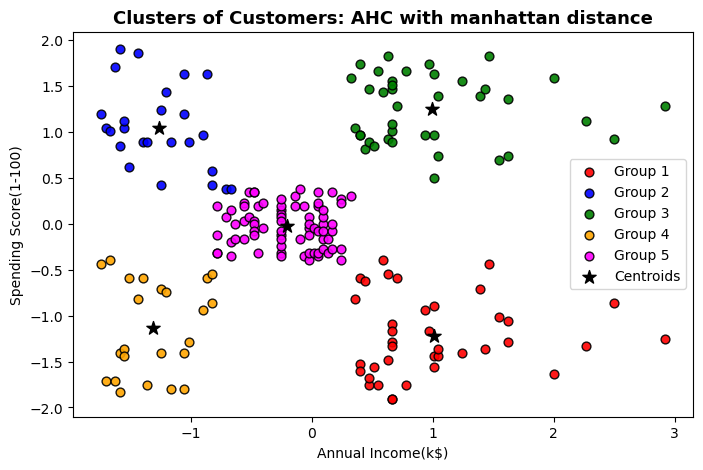

Count of Customers:
 4    75
2    39
0    38
1    25
3    23
Name: AHC_manhattan, dtype: int64


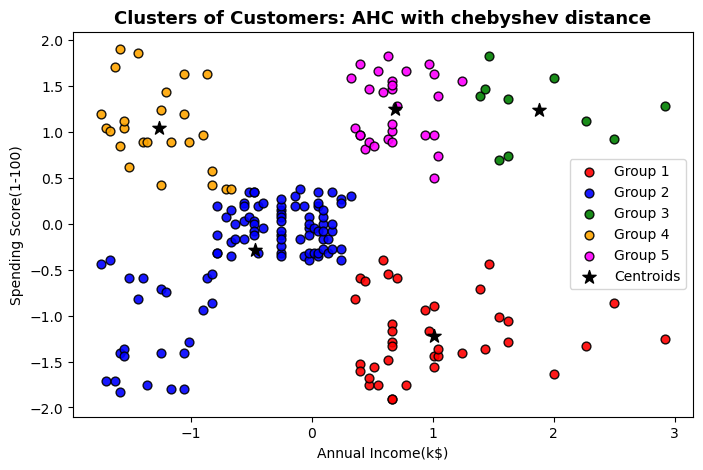

Count of Customers:
 1    98
0    38
4    29
3    25
2    10
Name: AHC_chebyshev, dtype: int64


In [38]:
agglomerative_clustering("manhattan", "complete")
agglomerative_clustering("chebyshev", "complete")

What a difference there is, especially in the case of Chebyshev distance! The metric used has a great impact on the clustering result. Then, how are we supposed to choose the "best" metric?

In clustering analysis, there is no such thing as **"best"** metric - it all depends on the specific problem and the nature of the data. Therefore, prior to applying any technique, we should have studied the data, made assumptions and chosen a distance metric that we think best captures the nuances of the dataset.

Sometimes, none of the standard distance metrics may not be applicable to our case. There exists an option to define a **custom metric** which better captures the characteristics of the data, and thus, leads to more meaningful and accurate cluster assignments.

Let's suppose that we are facing the same situation and none of the available metrics satisfy our needs. Also, let's say that Income affects the outcome more compared to the Spending Score.

We're defining the function for a two-dimensional space because of our specific use-case, but it can be extended. It is very similar to the Euclidean distance, except that the first dimension is raised to a higher power to reflect the assumption made.

In [39]:
def custom_dist(x, y):
    return np.sqrt((x[0] - y[0])**4 + (x[1]-y[1])**2)

Then, use the custom distance metric to perform the clustering and once again see how different the cluster assignments turn out to be.

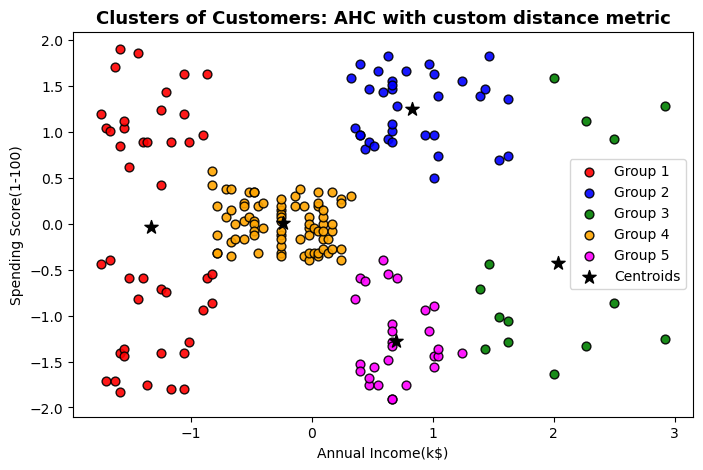

Count of Customers:
 3    79
0    44
1    35
4    28
2    14
Name: AHC_precomputed, dtype: int64


In [40]:
agglomerative_clustering("precomputed", "complete")

### Conclusion

This article gave a theoretical overview of the concept of clustering analysis, and the different algorithms and distance metrics that can be applied to obtain partitioning of a dataset to a number of similar groups. A couple of practical examples were provided with the objective of demonstrating the techniques being discussed. 

We’ve seen that two of the most popular clustering algorithms – K-Means and Agglomerative clustering, resulted in almost the same cluster assignments when using the Euclidean distance as a measurement. However, we’ve also seen that performing the same algorithm a couple of times, but with different distance metrics, led to dividing the dataset to completely different clusters.

Based on that, we can definitely say that the clustering algorithm is important, but choosing an appropriate dissimilarity measure is far more important in obtaining success with the clustering. 

There is **no best** distance measure, there is only a **best** distance measure for a given dataset and it should be aligned with the nature of the data and the goals of the analysis.

It’s also important to note that the key idea of distance in relation to clustering is not in the exact value of the measurements, but in the way those measurements are used to group the data points. For example, the measures may be multiplied by a number, but that will change only the values and not the clustering outcomes.

### References

1. https://core.ac.uk/download/pdf/80716648.pdf
2. https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa
3. https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/
4. https://www.analyticsvidhya.com/blog/2021/08/hierarchical-clustering-algorithm-python/
5. https://neptune.ai/blog/clustering-algorithms
6. https://nzlul.medium.com/clustering-method-using-k-means-hierarchical-and-dbscan-using-python-5ca5721bbfc3
7. https://scikit-learn.org/stable/auto_examples/cluster/plot_mini_batch_kmeans.html#example-cluster-plot-mini-batch-kmeans-py
8. https://iotespresso.com/how-to-add-custom-distance-metric-in-dbscan/